In [1]:
!pip install -qU \
  langchain-core \
  langchain-google-genai \
  langchain-community \
  langgraph

%load_ext autoreload
%autoreload 2

In [2]:
from typing_extensions import TypedDict

class JobApplicationState(TypedDict):
    job_description: str
    is_suitable: bool
    application: str

In [3]:
from langgraph.graph import StateGraph, START, END

def analyze_job_description(state):
    print("...Analyzing a provided job description...")
    return {"is_suitable" : len(job_description) > 100 }

def generate_application(state):
    print("...generating application...")
    return {"application": "some_fake_application"}

builder = StateGraph(JobApplicationState)

builder.add_node("analyze_job_description", analyze_job_description)
builder.add_node("generate_application", generate_application)

builder.add_edge(START, "analyze_job_description")
builder.add_edge("analyze_job_description", "generate_application")
builder.add_edge("generate_application", END)

graph = builder.compile()

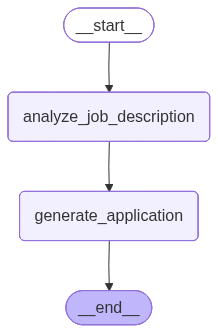

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))